水果图片分类

包含1036张水果图片，共5个类别（苹果288张、香蕉275张、葡萄
216张、橙子276张、梨251张）

In [83]:
# !cp /content/drive/MyDrive/DL/data_test/fruits.zip ./

In [84]:
# !unzip -qq fruits.zip

In [85]:
# import os

# for root, dirs, files in os.walk('fruits'):
#     for file in files:
#         # 获取子文件夹名
#         subdir_name = os.path.basename(root)
#         # 构造新的文件名
#         new_file_name = f"{subdir_name}.{file}"
#         # 获取文件的原始完整路径
#         old_file_path = os.path.join(root, file)
#         # 获取新的文件完整路径
#         new_file_path = os.path.join(root, new_file_name)
#         # 重命名文件
#         os.rename(old_file_path, new_file_path)

In [86]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [87]:
base_dir = 'fruits'

# data preprocessing
from tensorflow.keras.utils import image_dataset_from_directory

train_ds, validation_ds = image_dataset_from_directory(base_dir, label_mode='categorical',validation_split=0.2,subset="both",batch_size=32,image_size=(180, 180),seed=42)

Found 1306 files belonging to 5 classes.
Using 1045 files for training.
Using 261 files for validation.


In [88]:
train_ds.class_names

['apple', 'banana', 'grape', 'orange', 'pear']

In [89]:
validation_ds.class_names

['apple', 'banana', 'grape', 'orange', 'pear']

In [90]:
# 计算validation_ds的大小
num_validation_samples = tf.data.experimental.cardinality(validation_ds).numpy()

In [91]:
num_validation_samples

9

In [92]:
# 定义我们想要用于验证的样本数量，剩下的将用于测试
num_val_samples = int(num_validation_samples * 0.5)

In [93]:
num_val_samples

4

In [94]:
val_ds = validation_ds.take(num_val_samples)

In [95]:
test_ds = validation_ds.skip(num_val_samples)

In [96]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [97]:
from keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [98]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 89, 89, 32)        0         
                                                           

In [99]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [100]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fruits_with_aug.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [101]:
history = model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/50
33/33 [==============================] - 6s 99ms/step - loss: 5.9965 - accuracy: 0.2057 - val_loss: 1.6067 - val_accuracy: 0.2188
Epoch 2/50
33/33 [==============================] - 3s 95ms/step - loss: 1.5082 - accuracy: 0.3426 - val_loss: 1.4788 - val_accuracy: 0.3594
Epoch 3/50
33/33 [==============================] - 3s 94ms/step - loss: 1.3154 - accuracy: 0.4833 - val_loss: 1.2293 - val_accuracy: 0.5156
Epoch 4/50
33/33 [==============================] - 3s 76ms/step - loss: 0.9649 - accuracy: 0.6431 - val_loss: 1.3895 - val_accuracy: 0.3594
Epoch 5/50
33/33 [==============================] - 3s 94ms/step - loss: 0.8895 - accuracy: 0.6699 - val_loss: 1.1524 - val_accuracy: 0.5312
Epoch 6/50
33/33 [==============================] - 4s 102ms/step - loss: 0.7342 - accuracy: 0.7110 - val_loss: 0.9722 - val_accuracy: 0.5938
Epoch 7/50
33/33 [==============================] - 4s 103ms/step - loss: 0.6668 - accuracy: 0.7483 - val_loss: 0.7654 - val_accuracy: 0.7188
Epoch 8/50


In [102]:
import matplotlib.pyplot as plt


def show_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

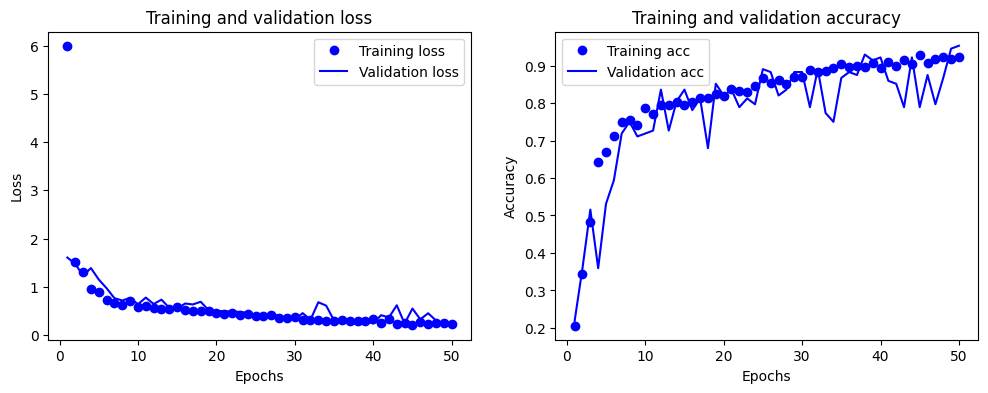

In [103]:
show_history(history)

In [104]:
test_model = keras.models.load_model("fruits_with_aug.keras")
test_loss, test_acc = test_model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.3f}")

5/5 [==============================] - 0s 21ms/step - loss: 0.1702 - accuracy: 0.9474
Test accuracy: 0.947


In [105]:
from sklearn.metrics import classification_report

# 获取测试集的真实标签
y_true = np.concatenate([y for x, y in test_ds], axis=0)

In [106]:
# 获取预测结果
y_pred = model.predict(test_ds)

5/5 [==============================] - 0s 21ms/step


In [107]:
y_pred = np.argmax(y_pred, axis=1)

In [108]:
y_true = np.argmax(y_true, axis=1)

In [109]:
# 生成分类报告
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.93      0.96      0.95        27
           2       1.00      0.91      0.95        23
           3       0.97      0.94      0.95        31
           4       0.88      0.96      0.92        24

    accuracy                           0.95       133
   macro avg       0.95      0.95      0.95       133
weighted avg       0.95      0.95      0.95       133

